# To extract PL at certain pixel from different frames and put in one txt file.

In [1]:
#import relevant libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

#### Read and check basic parameters of the PL spectra

In [2]:
bkg_raw = np.loadtxt('bkg_1s.csv',skiprows=0,delimiter=',')

In [4]:
bkg_raw.shape

(134000, 2)

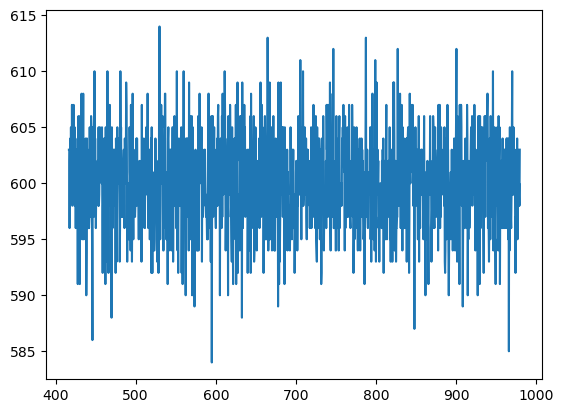

In [5]:
plt.plot(bkg_raw[:1340, 0], bkg_raw[:1340, 1])

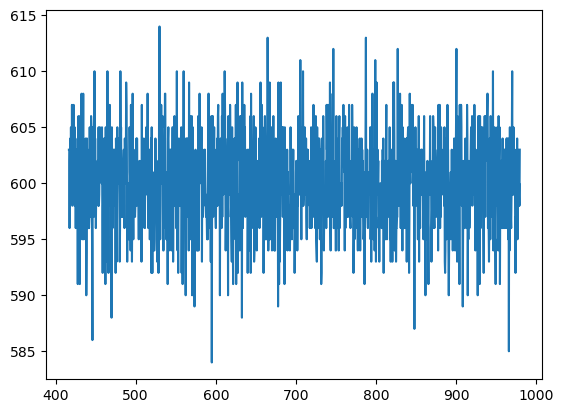

In [6]:
bkg = np.zeros((1340, 2))

bkg = bkg_raw[:1340, :]

plt.plot(bkg[:, 0], bkg[:, 1])

In [173]:
data_raw = np.loadtxt('WS2 NR_S2_WF max power 30mW_150g_4.4K_image2, R1 plwander 0.1s 5000frame_21-23,25,48 - (2)-1000.csv',skiprows=0,delimiter=',')

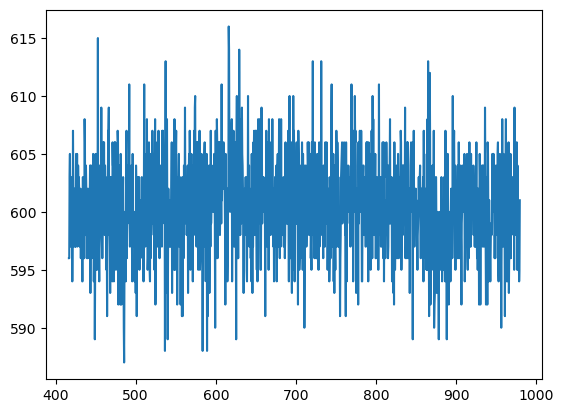

In [144]:
plt.plot(data_raw[:1340, 0], data_raw[:1340, 1])

In [145]:
hpixel = 1340 #the number of horizontal pixel number 
vpixel = 100 #the number of vertical pixel number 
frame_n = 1000 #the number of how many frames were measured
data = np.zeros((hpixel, vpixel*frame_n+1)) # 1 for using first column as wavelength cloumn

In [146]:
#data[:,0]=bkg[:1340,0] 
data[:,0] = 1239.842/data_raw[:hpixel,0]

In [147]:
for i in range(1,vpixel*frame_n+1):
    data[:,i] = data_raw[hpixel*(i-1):hpixel*i,1] - bkg[:,1]

In [148]:
data.shape

(1340, 100001)

In [112]:
## To get the averaged PL spectra cross servel pixel

In [167]:
pixelnumber = 34
piexl_n_2average = 1 # how many pixel to pick up for spectra, minimum 1

(1.75, 2.15)

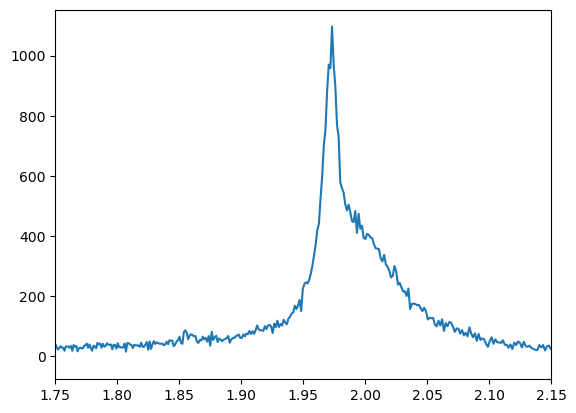

In [168]:
plt.plot(data[:,0],data[:,pixelnumber])
plt.xlim(1.75, 2.15)

In [169]:
data_pixel = np.zeros((hpixel,frame_n+1)) # 1 for using first column as wavelength cloumn
data_pixel[:,0] = data[:, 0]

for i in range(1,frame_n+1):
    for j in range(0,piexl_n_2average):
        data_pixel[:,i] += data[:, pixelnumber+vpixel*(i-1)+j]  # the num 14 is the piexl we are interested in
    data_pixel[:,i] = data_pixel[:,i]/piexl_n_2average

In [170]:
data_pixel[:,1].max()

1097.0

In [171]:
data_pixel.shape

(1340, 1001)

In [172]:
file_to_output = open('pixel'+str(pixelnumber)+'.txt', mode='w', newline='')
csv_writer = csv.writer(file_to_output, delimiter='\t')
csv_writer.writerows(data_pixel) 

# Take out peak energy and intensity for EvsTime and spectra wondering

In [38]:
E_Inten_vsTime = np.zeros((frame_n, 3))

In [39]:
t_accumulation = 1  #unit s

In [40]:
E_Inten_vsTime[:, 0] = np.transpose(np.arange(0,frame_n)) * t_accumulation

In [41]:
for i in range(0,frame_n):
    for j in range(hpixel):
        if data_pixel[:,i].max() == data_pixel[j,i]:
            E_Inten_vsTime[i, 1] = data_pixel[j,0]
            E_Inten_vsTime[i, 2] = data_pixel[j,i]

Text(0.5, 1.0, "['Peak energy vs Time']")

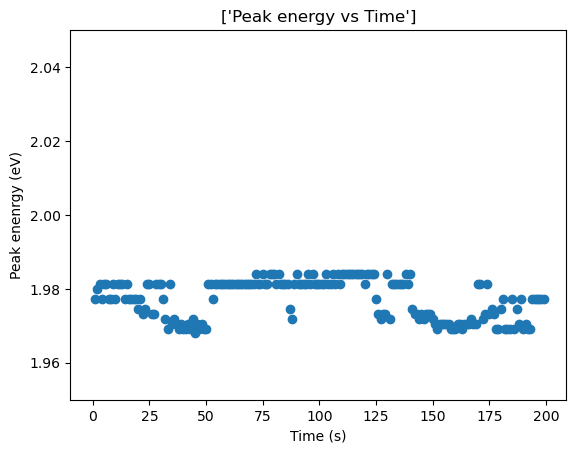

In [42]:
plt.plot(E_Inten_vsTime[:, 0], E_Inten_vsTime[:, 1], "o")
plt.xlabel('Time (s)')
#plt.xlim(5,1000)
plt.ylim(1.95,2.05)
plt.ylabel('Peak enenrgy (eV)')
plt.title(['Peak energy vs Time'])

Text(0.5, 1.0, "['Peak energy vs Intensity']")

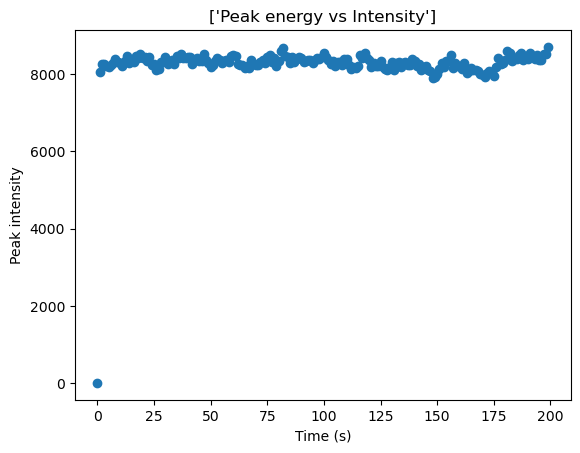

In [43]:
plt.plot(E_Inten_vsTime[:, 0], E_Inten_vsTime[:, 2], "o")
plt.xlabel('Time (s)')
#plt.xlim(0,101)
#plt.ylim(1.95,2.05)
plt.ylabel('Peak intensity')
plt.title(['Peak energy vs Intensity'])